In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Crop_recommendation.csv')
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [3]:
data = data.drop(columns=['label'])

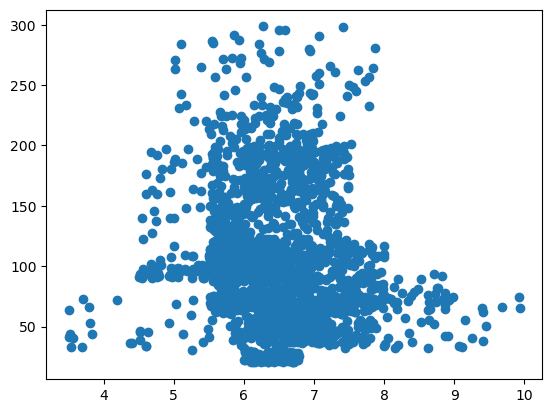

In [4]:
data=data.loc[:,['ph','rainfall']]
plt.scatter(data.ph, data.rainfall)

In [5]:
data=np.array(data)

In [6]:
data.shape

(2200, 2)

In [7]:
K=5
m=3

U=np.random.rand(data.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[3.36899670e-01, 1.71732007e-03, 1.87038336e-01, 2.35307920e-01,
        2.39036754e-01],
       [1.96208173e-01, 2.74259094e-01, 1.75718976e-01, 2.16677754e-01,
        1.37136003e-01],
       [1.75657548e-01, 1.62049531e-01, 3.46882905e-01, 3.15161581e-01,
        2.48435885e-04],
       ...,
       [2.54449024e-01, 2.73514397e-01, 4.60463711e-02, 3.22552046e-01,
        1.03438162e-01],
       [2.97772353e-01, 4.60668267e-02, 3.63280296e-01, 2.49429428e-01,
        4.34510967e-02],
       [4.40361171e-01, 1.32331736e-01, 1.44220715e-01, 3.95372045e-02,
        2.43549175e-01]])

In [8]:
Centroids=np.zeros((K,data.shape[1]))
for i in range (K):
    Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
Centroids

array([[  6.42579017, 105.655527  ],
       [  6.49874206, 103.98649924],
       [  6.49490732, 103.87477581],
       [  6.46215996, 102.46619514],
       [  6.44996127,  99.29330926]])

In [9]:
def calculate_centroid (data, K, U, m):
    Centroids=np.zeros((K,data.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [10]:
U_new = np.zeros((data.shape[0],K))
for i in range (K):
    U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)
U_new

array([[ 97.28003983,  98.94903705,  99.06076072, 100.46934935,
        103.64224051],
       [121.00155964, 122.67022388, 122.78196313, 124.19067772,
        127.36358608],
       [158.31503906, 159.98337257, 160.09512425, 161.50393172,
        164.67680686],
       ...,
       [ 67.6673411 ,  69.336473  ,  69.4481888 ,  70.85671339,
         74.02958088],
       [ 21.52234213,  23.19025168,  23.30201123,  24.71087813,
         27.88369385],
       [ 35.28329083,  36.9516114 ,  37.06336089,  38.47215793,
         41.64503872]])

In [11]:
def calculate_membership (data, Centroids, K , m):
    U_new = np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [12]:
labels=np.argmax(U_new, axis=1)
labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [13]:
# Misalkan 'data' adalah numpy array
df = pd.DataFrame(data, columns=['ph', 'rainfall'])  # Ubah 'X' dan 'Y' sesuai nama fitur
df['labels'] = labels  # Tambahkan label ke DataFrame

<AxesSubplot:xlabel='rainfall', ylabel='ph'>

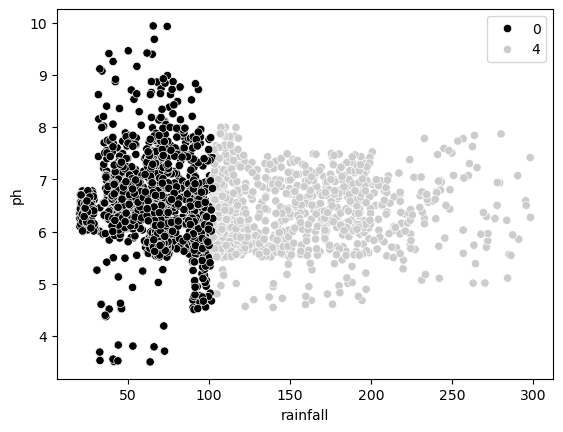

In [14]:
sns.scatterplot(data=df, x=df['rainfall'],y=df['ph'], hue=labels, palette='nipy_spectral')

In [15]:
max_iteration=100
for iteration in range (max_iteration):
    Centroids=calculate_centroid(data, 5, U , 3)
    U_new= calculate_membership (data,Centroids, 5 , 3 )
    
    
    
    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new
    
    labels=np.argmax(U_new, axis=1)

<AxesSubplot:xlabel='rainfall', ylabel='ph'>

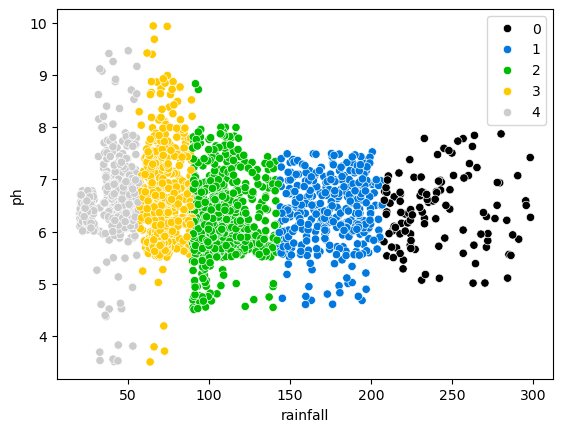

In [16]:
sns.scatterplot(data=df, x=df['rainfall'],y=df['ph'], hue=labels, palette='nipy_spectral')

In [17]:
def fuzzy_cmeans_with_prediction(data, K=5, m=3, max_iteration=100, epsilon=1e-5):
    # Inisialisasi matriks keanggotaan U secara acak
    U = np.random.dirichlet(np.ones(K), size=data.shape[0])

    for iteration in range(max_iteration):
        # Menghitung centroid berdasarkan keanggotaan saat ini
        Centroids = calculate_centroid(data, K, U, m)
        
        # Menghitung matriks keanggotaan baru
        U_new = calculate_membership(data, Centroids, K, m)
        
        # Memeriksa konvergensi
        if np.linalg.norm(U_new - U) <= epsilon:
            break
        
        # Memperbarui matriks keanggotaan
        U = U_new
    
    # Menentukan label klaster berdasarkan nilai keanggotaan maksimum
    labels = np.argmax(U, axis=1)
    
    # Input dari pengguna
    ph_input = float(input("Masukkan nilai pH: "))
    rainfall_input = float(input("Masukkan nilai rainfall: "))
    
    # Buat array untuk input pengguna
    input_point = np.array([[ph_input, rainfall_input]])
    
    # Hitung keanggotaan untuk input pengguna menggunakan fungsi calculate_membership
    U_input = calculate_membership(input_point, Centroids, K, m)
    
    # Prediksi klaster adalah klaster dengan keanggotaan maksimum
    predicted_cluster = np.argmax(U_input) + 1  # +1 untuk membuat klaster 1-based
    
    print(f"Nilai pH: {ph_input}, Rainfall: {rainfall_input}")
    print(f"Hasil prediksi klaster: {predicted_cluster}")
    
    return Centroids, labels, U, predicted_cluster

In [19]:
# Jalankan fungsi dengan iterasi Fuzzy C-Means dan prediksi klaster
Centroids, labels, U, predicted_cluster = fuzzy_cmeans_with_prediction(data, K=3, m=2)

Masukkan nilai pH: 6
Masukkan nilai rainfall: 160
Nilai pH: 6.0, Rainfall: 160.0
Hasil prediksi klaster: 1
